# SVD for Image Compression

## Overview

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix $X$ (of size $m \times n$) into three matrices:

$$X = U \Sigma V^T$$

where:
- $U$ is an $m \times m$ orthogonal matrix (left singular vectors)
- $\Sigma$ is an $m \times n$ diagonal matrix (singular values)
- $V^T$ is an $n \times n$ orthogonal matrix (right singular vectors)

## How SVD Enables Compression

The key insight for compression is that the singular values in $\Sigma$ are ordered by magnitude, with the largest values appearing first. This ordering reflects the "importance" of each component in reconstructing the original matrix.

### Low-Rank Approximation

We can create a compressed version of $X$ by keeping only the first $r$ components:

$$\hat{X} = \hat{U} \hat{\Sigma} \hat{V}^T$$

where:
- $\hat{U}$ contains the first $r$ columns of $U$ (size $m \times r$)
- $\hat{\Sigma}$ contains the top-left $r \times r$ block of $\Sigma$
- $\hat{V}^T$ contains the first $r$ rows of $V^T$ (size $r \times n$)

This gives us a rank-$r$ approximation of the original matrix $X$, trading off accuracy for storage efficiency. The smaller the value of $r$, the greater the compression but the lower the reconstruction quality.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

First, we read the image and transform it into grayscale. This image has 2.000 rows and 1.500 columns

In [12]:
A = imread("./data/dog.jpg")
X = A.mean(axis = -1)
print(X.shape)

(2000, 1500)


We compute the SVD using NumPy's linalg module. Setting `full_matrices=False` returns the "economy" version of the decomposition, which produces only the first m columns of $U$ (assuming $m = \min(m, n$)), since the remaining columns are not needed for reconstruction.

In [60]:
U, S, Vt = np.linalg.svd(X, full_matrices = False)
S = np.diag(S)

We now reconstruct the image using different ranks r approximations and plot the results to compare how compression level affects image quality.

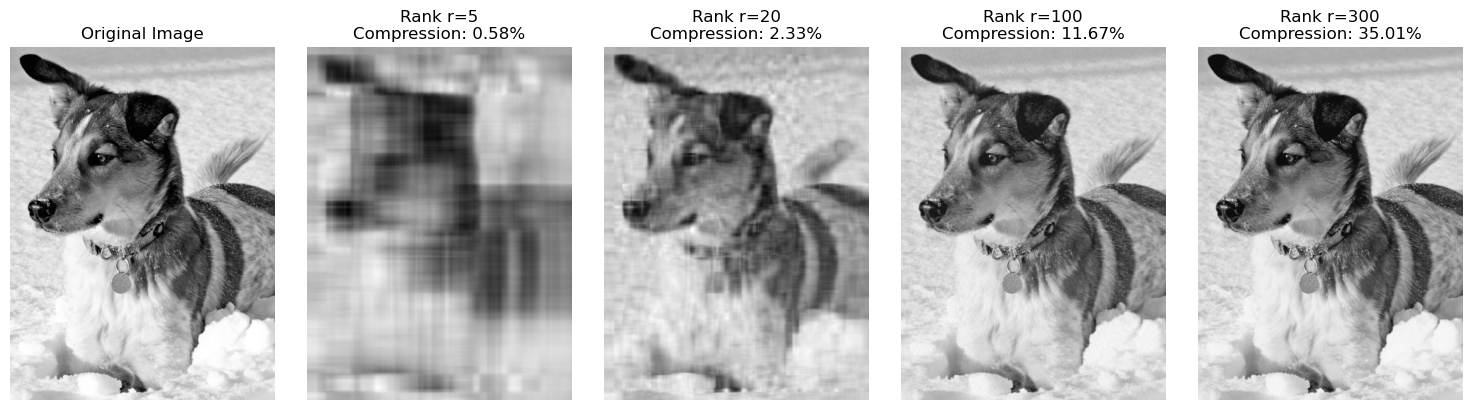

In [71]:
def reconstruct(r):
    return U[:, :r] @ S[:r, :r] @ Vt[:r, :]

ranks = [5, 20, 100, 300]
fig, axes = plt.subplots(1, len(ranks) + 1, figsize=(15, 4))

axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for idx, r in enumerate(ranks, start=1):
    Xaprox = reconstruct(r)
    compression = (r * (2000 + 1500) + r) / (2000 * 1500) * 100
    axes[idx].imshow(Xaprox, cmap='gray')
    axes[idx].set_title(f'Rank r={r}\nCompression: {compression:.2f}%')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

The image with rank $r=100$ already looks like a good aproximation of the, and the compression is quite nice as we just need $12\%$ of the space. 

It is a good practice to plot the "importances" of the components of $U$ and $V$, to see how many we might need to get a compressed image that is representative of the actual image.

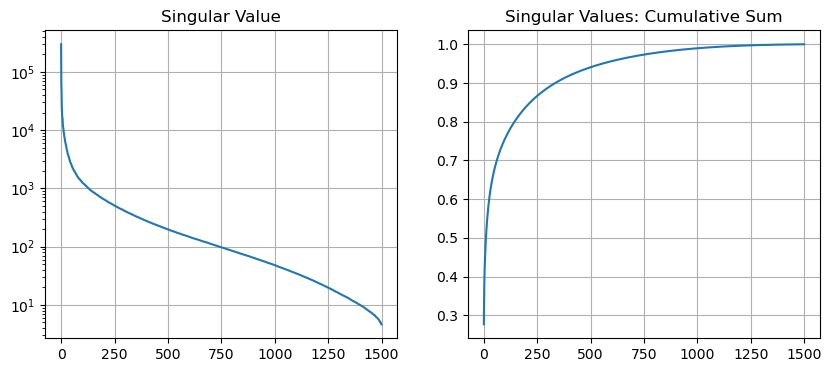

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].semilogy(np.diag(S))
axes[0].set_title('Singular Value')
axes[0].grid('True')

axes[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
axes[1].set_title('Singular Values: Cumulative Sum')
axes[1].grid('True')

We could also plot the correlation matrices:

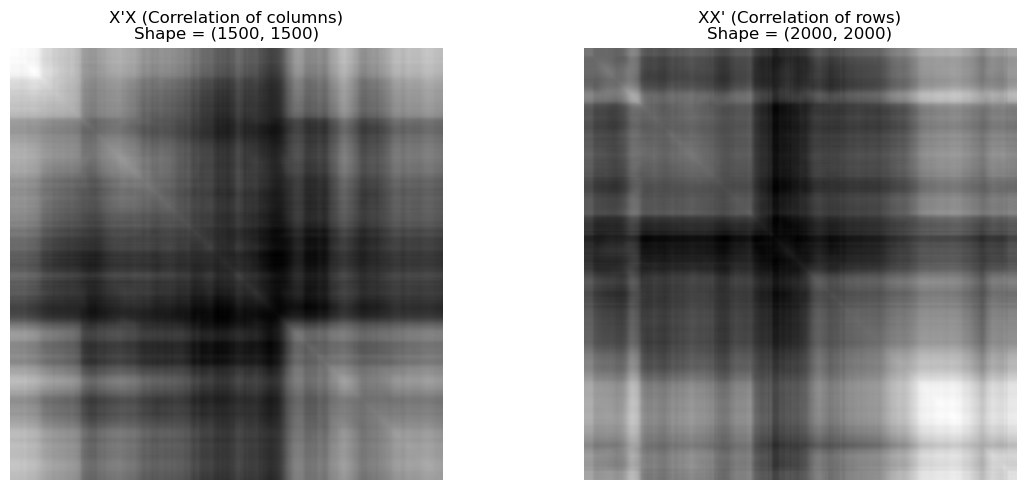

In [78]:
XXt = X @ X.T  
XtX = X.T @ X  

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(XtX, cmap='gray')
axes[0].set_title(f"X'X (Correlation of columns)\nShape = {XtX.shape}")
axes[0].axis('off')

axes[1].imshow(XXt, cmap='gray')
axes[1].set_title(f"XX' (Correlation of rows)\nShape = {XXt.shape}")
axes[1].axis('off')

plt.tight_layout()
plt.show()